# Plant Disease Recognition

#### Importing the libraries

In [28]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
from keras_preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
tf.__version__

'2.16.1'

#### Dataset initialization and pre-processing

In [6]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

training_set = train_datagen.flow_from_directory(
    'C:\\Users\\Abhijat\\Documents\\MachineLearningProjects\\PlantDiseaseClassifier\\Dataset\\Train',
    target_size = (64,64),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1322 images belonging to 3 classes.


In [8]:
# Preprocessing the test set

test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(
    'C:\\Users\\Abhijat\\Documents\\MachineLearningProjects\\PlantDiseaseClassifier\\Dataset\\Test',
    target_size = (64,64),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 150 images belonging to 3 classes.


#### Buliding the CNN

In [11]:
cnn = tf.keras.Sequential()

# Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64,64,3]))

# Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Add a 2nd convolution layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Flattening
cnn.add(tf.keras.layers.Flatten())

# Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Output Layers
cnn.add(tf.keras.layers.Dense(units=3, activation='softmax'))

C:\Users\Abhijat\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Training the CNN

In [14]:
# Compile

cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 

In [16]:
# Train the CNN and eval

cnn.fit(x=training_set, validation_data=test_set, epochs=25)

Epoch 1/25


C:\Users\Abhijat\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 ━━━━━━━━━━━━━━━━━━━━ 130s 3s/step - accuracy: 0.4609 - loss: 1.1036 - val_accuracy: 0.6467 - val_loss: 0.7381
Epoch 2/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.6906 - loss: 0.6899 - val_accuracy: 0.7400 - val_loss: 0.6458
Epoch 3/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.7626 - loss: 0.5593 - val_accuracy: 0.7533 - val_loss: 0.6251
Epoch 4/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.8095 - loss: 0.4820 - val_accuracy: 0.7133 - val_loss: 0.6697
Epoch 5/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.8355 - loss: 0.4290 - val_accuracy: 0.8133 - val_loss: 0.4620
Epoch 6/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.8434 - loss: 0.3822 - val_accuracy: 0.8600 - val_loss: 0.3945
Epoch 7/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.8802 - loss: 0.3312 - val_accuracy: 0.8533 - val_loss: 0.4493
Epoch 8/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.9043 - loss: 0.2710 - val_accuracy: 0.7867 - val_loss: 0.6405
Ep

#### Evaluation

In [32]:
# Test a single image

def PredictOutcome(path):
    img = mpimg.imread(path)
    imgplot = plt.imshow(img)
    
    testImg = image.load_img(path, target_size=(64,64))
    testImg = image.img_to_array(testImg)
    testImg = np.expand_dims(testImg, axis=0)
    result = cnn.predict(testImg)
    training_set.class_indices
    if result[0][0] == 1 :
        prediction = "Healthy"
    elif result[0][1] == 1 :
        prediction = "Powdery"
    else:
        prediction = "Rusty"
        
    print(prediction)
    plt.show()
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Powdery


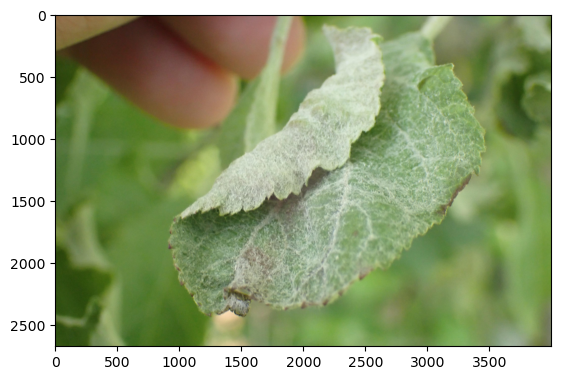

In [34]:
PredictOutcome("C:\\Users\\Abhijat\\Documents\\MachineLearningProjects\\PlantDiseaseClassifier\\Dataset\\Validation\\Powdery\\9c1e3a3aa68c7971.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Rusty


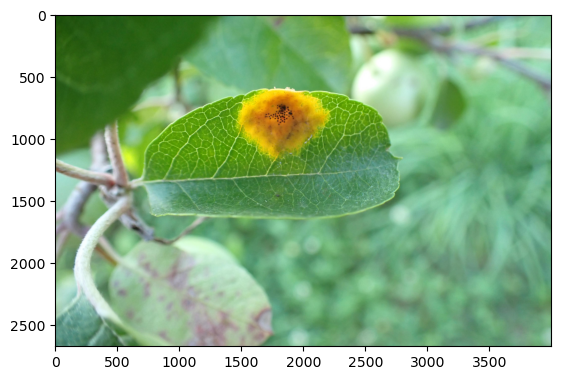

In [36]:
PredictOutcome("C:\\Users\\Abhijat\\Documents\\MachineLearningProjects\\PlantDiseaseClassifier\\Dataset\\Validation\\Rust\\860a8fbf3c6c00fd.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Healthy


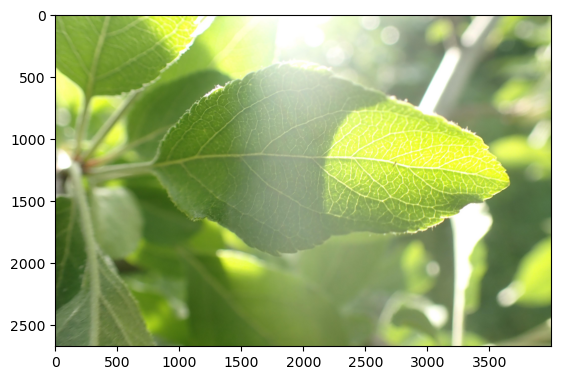

In [38]:
PredictOutcome("C:\\Users\\Abhijat\\Documents\\MachineLearningProjects\\PlantDiseaseClassifier\\Dataset\\Validation\\Healthy\\9ccbc2c5d1aaf078.jpg")